In [ ]:
# 📘 Project: Walmart Sales Forecasting

# --- Step 1: Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# --- Step 2: Load the Data ---
df = pd.read_csv('train.csv')
df.head() #displays the first 5 rows


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
# Check the shape and data types
df.info()

# Check for missing values
df.isnull().sum()

# Describe numerical columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [ ]:
print(df.columns)


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check cleaned names
print(df.columns)


Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales'],
      dtype='object')


In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)
df['ship_date'] = pd.to_datetime(df['ship_date'], dayfirst=True)



In [ ]:
df[['order_date', 'ship_date']].head()


,order_date,ship_date
0,2017-11-08,2017-11-11
1,2017-11-08,2017-11-11
2,2017-06-12,2017-06-16
3,2016-10-11,2016-10-18
4,2016-10-11,2016-10-18


CALC shipping delay

In [ ]:
df['shipping_delay'] = (df['ship_date'] - df['order_date']).dt.days


In [ ]:
print(df[['order_date', 'ship_date', 'shipping_delay']].head())
print(df['shipping_delay'].describe())


  order_date  ship_date  shipping_delay
0 2017-11-08 2017-11-11               3
1 2017-11-08 2017-11-11               3
2 2017-06-12 2017-06-16               4
3 2016-10-11 2016-10-18               7
4 2016-10-11 2016-10-18               7
count    9800.000000
mean        3.961122
std         1.749614
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: shipping_delay, dtype: float64


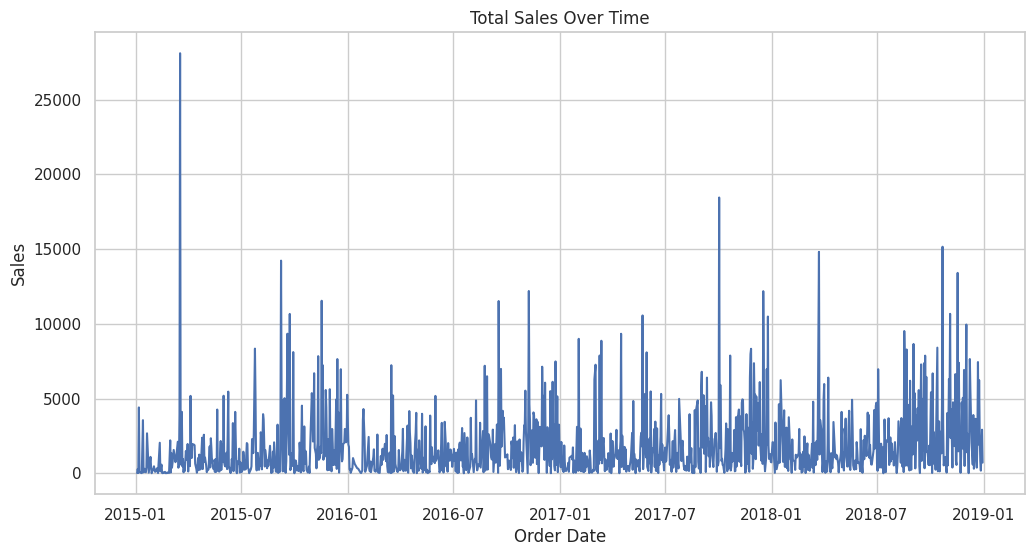

In [ ]:
daily_sales = df.groupby('order_date')['sales'].sum().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['order_date'], daily_sales['sales'])
plt.title("Total Sales Over Time")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


A. TOP 10 sub categpries by Total Sales

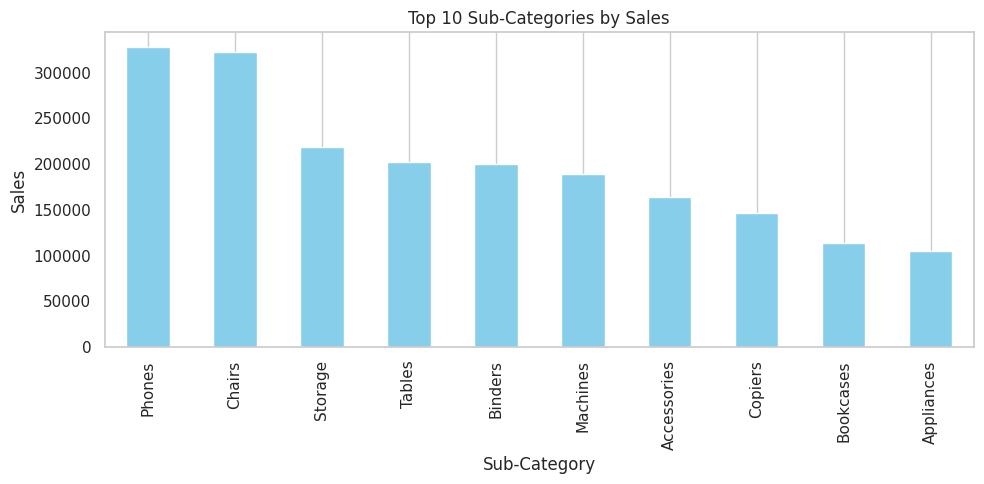

In [ ]:
top_subcategories = df.groupby('sub-category')['sales'].sum().sort_values(ascending=False).head(10)

top_subcategories.plot(kind='bar', figsize=(10,5), title="Top 10 Sub-Categories by Sales", color='skyblue')
plt.ylabel("Sales")
plt.xlabel("Sub-Category")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


B Sales by region

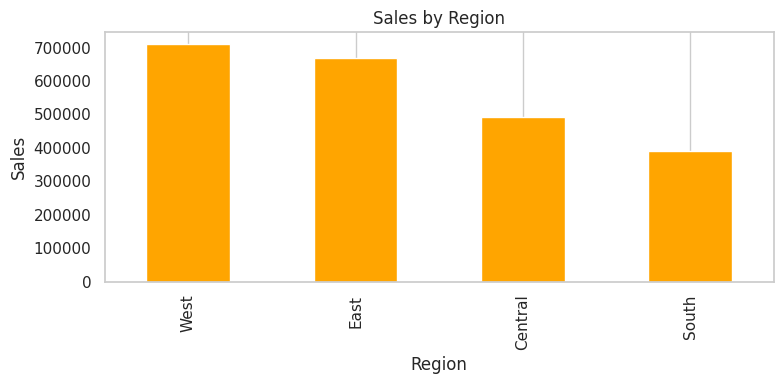

In [ ]:
region_sales = df.groupby('region')['sales'].sum().sort_values(ascending=False)

region_sales.plot(kind='bar', figsize=(8,4), title="Sales by Region", color='orange')
plt.ylabel("Sales")
plt.xlabel("Region")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C. Salles by Segment

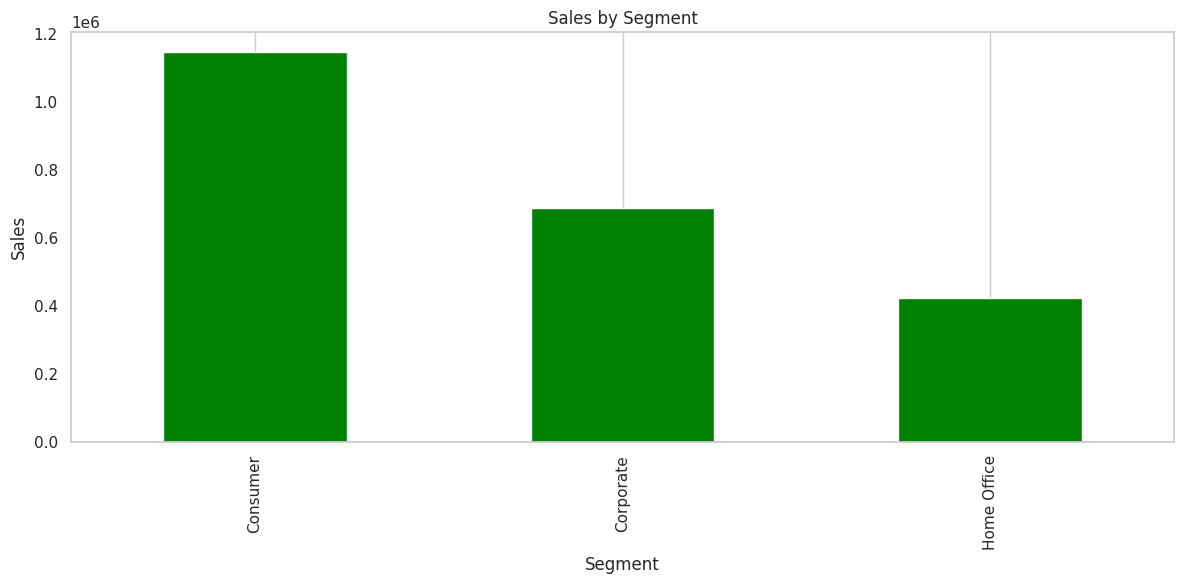

In [ ]:
segment_sales = df.groupby('segment')['sales'].sum()

segment_sales.plot(kind='bar', title="Sales by Segment", color='green')
plt.ylabel("Sales")
plt.xlabel("Segment")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


D. Shipping delay distribution

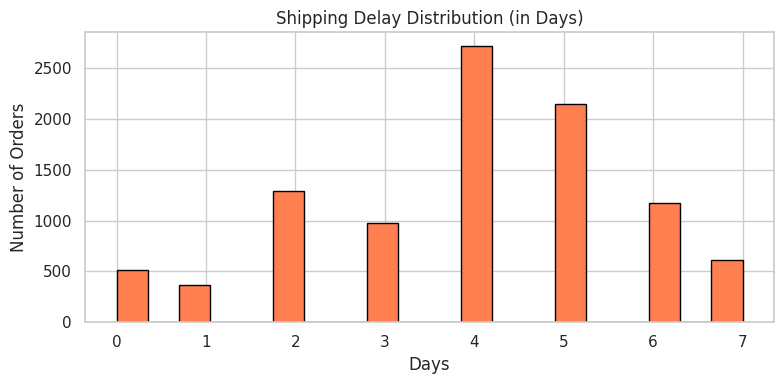

In [ ]:
plt.figure(figsize=(8,4))
plt.hist(df['shipping_delay'], bins=20, color='coral', edgecolor='black')
plt.title("Shipping Delay Distribution (in Days)")
plt.xlabel("Days")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.tight_layout()
plt.show()


FEATURE ENGINEERIG: step 1- extract date features

In [ ]:
df['order_month'] = df['order_date'].dt.month
df['order_year'] = df['order_date'].dt.year
df['order_dayofweek'] = df['order_date'].dt.dayofweek
df['order_quarter'] = df['order_date'].dt.quarter


ADD " is weeekend order " feature

In [ ]:
df['is_weekend_order'] = df['order_dayofweek'].isin([5, 6]).astype(int)


Calculate shippin delay

In [ ]:
df['shipping_delay_days'] = (df['ship_date'] - df['order_date']).dt.days


Categorize data into fast, normal..Customer exp feature

In [ ]:
def classify_shipping_speed(days):
    if days <= 1:
        return 'Fast'
    elif days <= 3:
        return 'Normal'
    elif days <= 5:
        return 'Slow'
    else:
        return 'Very Slow'

df['shipping_speed'] = df['shipping_delay_days'].apply(classify_shipping_speed)


Add customer order frequency

In [ ]:
customer_freq = df['customer_id'].value_counts()
df['customer_order_count'] = df['customer_id'].map(customer_freq)


Compute total sales perr order

In [ ]:
order_sales = df.groupby('order_id')['sales'].sum().reset_index()
order_sales.columns = ['order_id', 'total_order_sales']
df = df.merge(order_sales, on='order_id', how='left')


In [ ]:
df.to_csv('powerbi_data.csv', index=False)


In [ ]:
from google.colab import files
files.download('powerbi_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Fill NaNs with empty strings or a default value
df_clean = df.fillna('')

# Export to CSV with safe encoding and no index
df_clean.to_csv('powerbi_clean.csv', index=False, encoding='utf-8-sig')

# Download the file to your system
from google.colab import files
files.download('powerbi_clean.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>